<a href="https://colab.research.google.com/github/mafeacero/Reconocimiento-emociones-con-LSTM-y-CNN/blob/master/NN_Audio_An%C3%A1lsis_de_sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal Audios: Análisis de Sentimientos

## Tabla de Contenidos 
1. [Audios General (Speech y song)](#first-bullet)
  
  1.1. [Carga de base de datos](#first-bullet1)
  
  1.2. [Importar paquetes](#first-bullet2)
  
  1.3. [Lectura de datos](#first-bullet3)
  
  1.4. [Separación datos en train y test](#first-bullet4)
  
  1.5. [Definición del modelo](#first-bullet5)
  
  1.6. [Gráficos de accuracy y loss](#first-bullet6)

2. [Solo audios SPEECH](#second-bullet)
  
  2.1. [Elección de datos](#second-bullet1)
  
  2.2. [Separación de datos en train y test](#second-bullet2)
  
  2.3. [Definición del modelo](#second-bullet3)
  
  2.4. [Gráficos de accuracy y loss](#second-bullet4)


3. [Solo audios SONG](#third-bullet)
  
  3.1. [Elección de datos](#third-bullet1)
  
  3.2. [Separación de datos en train y test](#third-bullet2)
  
  3.3. [Definición del modelo](#third-bullet3)
  
  3.4. [Gráficos de accuracy y loss](#third-bullet4)


# General (Speech y song)<a class="anchor" id="first-bullet"></a>

## Carga de base de datos <a class="anchor" id="first-bullet1"></a>

In [62]:
from google.colab import drive #Conexión con Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importar paquetes <a class="anchor" id="first-bullet2"></a>

In [0]:
import librosa
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import os #para interactuar con las carpetas y archivos
import pandas as pd
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD
from scipy.stats import zscore

## Lectura de datos <a class="anchor" id="first-bullet3"></a>

In [0]:
# Loading saved models
import joblib

X = joblib.load('/content/drive/My Drive/Estadistica/Estadistica/Mineria de datos/Proyecto Minería de datos/Model_audio/X.joblib')
y = joblib.load('/content/drive/My Drive/Estadistica/Estadistica/Mineria de datos/Proyecto Minería de datos/Model_audio/y.joblib')
mod = joblib.load('/content/drive/My Drive/Estadistica/Estadistica/Mineria de datos/Proyecto Minería de datos/Model_audio/mod.joblib')


## Separación datos en train y test <a class="anchor" id="first-bullet4"></a>

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Definición del modelo <a class="anchor" id="first-bullet5"></a>

In [0]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(8, activation='softmax')
])

In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               5248      
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 1032      
Total params: 6,280
Trainable params: 6,280
Non-trainable params: 0
_________________________________________________________________


In [45]:
y=np.array(y)
y

array([0, 0, 0, ..., 5, 5, 5])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
history=model.fit(X_train, y_train, batch_size=5, epochs=100,  validation_data=(X_test, y_test))

Train on 1961 samples, validate on 491 samples
Epoch 1/100
1961/1961 [==============================] - 0s 239us/step - loss: 0.7951 - accuracy: 0.7323 - val_loss: 1.3178 - val_accuracy: 0.6436
Epoch 2/100
1961/1961 [==============================] - 0s 236us/step - loss: 0.6430 - accuracy: 0.7685 - val_loss: 1.0835 - val_accuracy: 0.6802
Epoch 3/100
1961/1961 [==============================] - 0s 239us/step - loss: 0.4773 - accuracy: 0.8261 - val_loss: 1.2876 - val_accuracy: 0.6395
Epoch 4/100
1961/1961 [==============================] - 0s 237us/step - loss: 0.5126 - accuracy: 0.8205 - val_loss: 1.2169 - val_accuracy: 0.6660
Epoch 5/100
1961/1961 [==============================] - 0s 238us/step - loss: 0.4920 - accuracy: 0.8215 - val_loss: 1.1196 - val_accuracy: 0.6802
Epoch 6/100
1961/1961 [==============================] - 0s 239us/step - loss: 0.4858 - accuracy: 0.8266 - val_loss: 1.2754 - val_accuracy: 0.6538
Epoch 7/100
1961/1961 [==============================] - 0s 239us/step 

## Gráficos de accuracy y loss <a class="anchor" id="first-bullet6"></a>


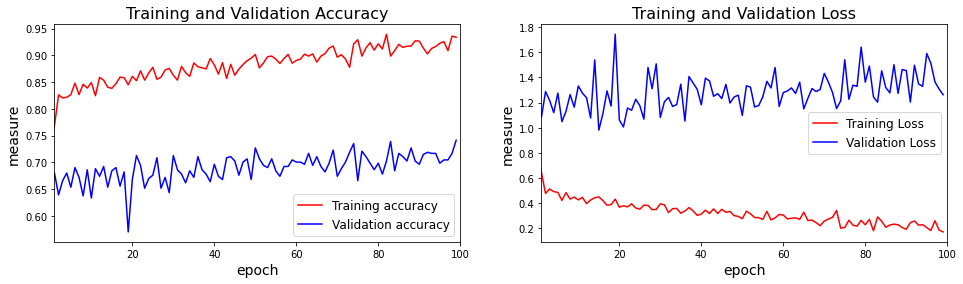

In [58]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])


plt.show()

In [60]:
scores = model.evaluate(X_test,
                        y_test,
                        batch_size=32)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

491/491 [==============================] - 0s 38us/step
Test loss: 1.2618140081766909
Test accuracy: 0.7413442134857178


# Solo SPEECH <a class="anchor" id="second-bullet"></a>



## Elección de datos <a class="anchor" id="second-bullet1"></a>

In [99]:
y=np.asarray(y)


(1440, 40)

In [0]:
X1=X[mod=='01',:]
y1=y[mod=='01']

In [77]:
print(X1.shape)
print(y1.shape)

(1440, 40)
(1440,)


## Separación datos en train y test <a class="anchor" id="second-bullet2"></a>

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

## Definición del modelo <a class="anchor" id="second-bullet3"></a>

In [0]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(8, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [108]:
history=model.fit(X_train, y_train, batch_size=1, epochs=100,  validation_data=(X_test, y_test))

Train on 1152 samples, validate on 288 samples
Epoch 1/100
1152/1152 [==============================] - 1s 1ms/step - loss: 1.6728 - accuracy: 0.4800 - val_loss: 1.7395 - val_accuracy: 0.4236
Epoch 2/100
1152/1152 [==============================] - 1s 1ms/step - loss: 1.1637 - accuracy: 0.5955 - val_loss: 1.7495 - val_accuracy: 0.4896
Epoch 3/100
1152/1152 [==============================] - 1s 1ms/step - loss: 1.0703 - accuracy: 0.6215 - val_loss: 2.2225 - val_accuracy: 0.4618
Epoch 4/100
1152/1152 [==============================] - 1s 1ms/step - loss: 1.0175 - accuracy: 0.6389 - val_loss: 1.8220 - val_accuracy: 0.4167
Epoch 5/100
1152/1152 [==============================] - 1s 1ms/step - loss: 1.0167 - accuracy: 0.6380 - val_loss: 1.6778 - val_accuracy: 0.5035
Epoch 6/100
1152/1152 [==============================] - 1s 1ms/step - loss: 0.9911 - accuracy: 0.6293 - val_loss: 2.0237 - val_accuracy: 0.4653
Epoch 7/100
1152/1152 [==============================] - 1s 1ms/step - loss: 0.9871

## Gráficos de accuracy y loss <a class="anchor" id="second-bullet4"></a>

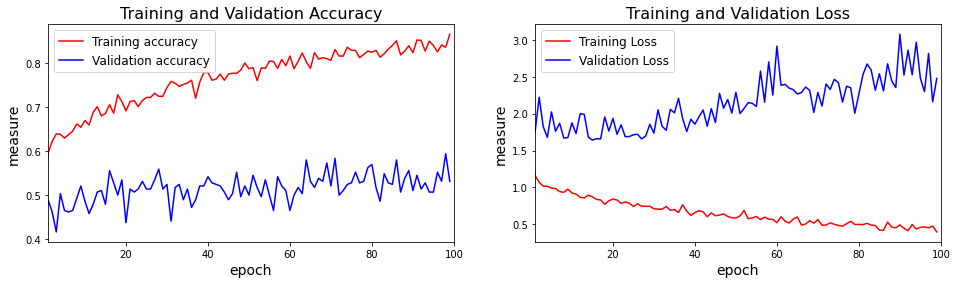

In [109]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])


plt.show()

# Solo SONG <a class="anchor" id="third-bullet"></a>

## Elección de datos <a class="anchor" id="third-bullet1"></a>

In [0]:
X2=X[mod=='02']
y2=y[mod=='02']

In [112]:
X2.shape

(1012, 40)

## Separación datos en train y test <a class="anchor" id="third-bullet2"></a>

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

## Definición del modelo <a class="anchor" id="third-bullet3"></a>

In [0]:
model2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(8, activation='softmax')
])

In [0]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
history=model2.fit(X_train, y_train, batch_size=5, epochs=100,  validation_data=(X_test, y_test))

Train on 809 samples, validate on 203 samples
Epoch 1/100
809/809 [==============================] - 0s 325us/step - loss: 8.9838 - accuracy: 0.2534 - val_loss: 3.6402 - val_accuracy: 0.3645
Epoch 2/100
809/809 [==============================] - 0s 237us/step - loss: 2.0988 - accuracy: 0.4400 - val_loss: 1.6380 - val_accuracy: 0.5172
Epoch 3/100
809/809 [==============================] - 0s 236us/step - loss: 1.4797 - accuracy: 0.5587 - val_loss: 1.8720 - val_accuracy: 0.4778
Epoch 4/100
809/809 [==============================] - 0s 256us/step - loss: 1.5117 - accuracy: 0.5871 - val_loss: 1.9103 - val_accuracy: 0.5320
Epoch 5/100
809/809 [==============================] - 0s 238us/step - loss: 1.1203 - accuracy: 0.6638 - val_loss: 1.5106 - val_accuracy: 0.5468
Epoch 6/100
809/809 [==============================] - 0s 235us/step - loss: 1.1191 - accuracy: 0.6737 - val_loss: 1.3548 - val_accuracy: 0.6404
Epoch 7/100
809/809 [==============================] - 0s 240us/step - loss: 0.9250 

## Gráficos de accuracy y loss <a class="anchor" id="third-bullet4"></a>

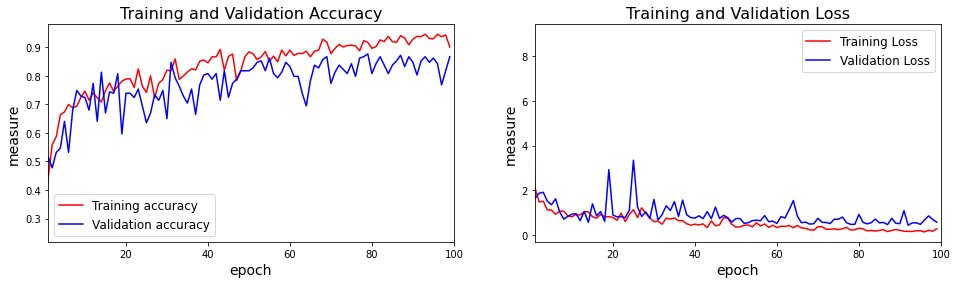

In [95]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])


plt.show()